In [93]:
# Load libraries 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [94]:
# Load dataset 
df = pd.read_csv('student.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [95]:
# Check for missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [96]:
# Check for duplicates
df.duplicated().sum()

0

In [97]:
# Check for dataset shape and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [98]:
# Check for unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [99]:
# Understand the unique values in each categorical column
for col in df.select_dtypes(include=['object']).columns:
    print(f"Categories in {col}:  {df[col].unique()}")

Categories in gender:  ['female' 'male']
Categories in race_ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch:  ['standard' 'free/reduced']
Categories in test_preparation_course:  ['none' 'completed']


In [100]:
numeric_only = df.select_dtypes(include=['number'])
category_only = df.select_dtypes(exclude=['number'])

print(f"Length of Numeric columns: {len(numeric_only.columns)}")
print(f"Length of Categorical columns: {len(category_only.columns)}")

Length of Numeric columns: 3
Length of Categorical columns: 5


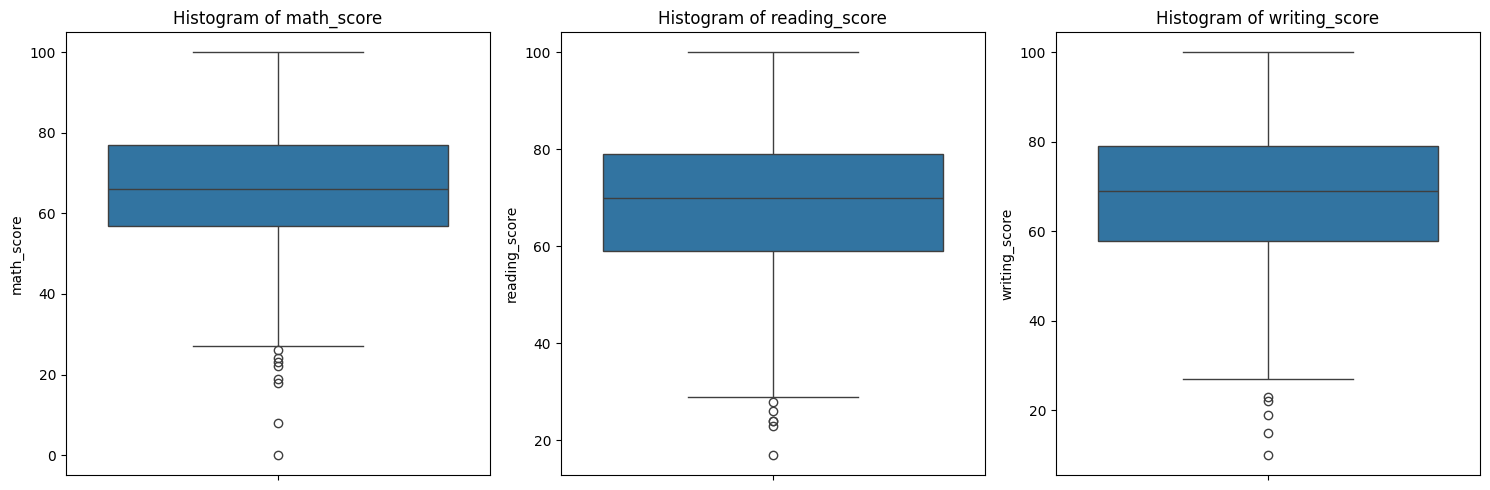

In [101]:
# Check for and distribution outliers in the numeric columns
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = len(numeric_only.columns)
num_rows = 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols*5, num_rows*5))

for i, col in enumerate(numeric_only.columns):
    sns.boxplot(df[col], ax=axs[i])
    axs[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

In [119]:
# Check for outliers across all numeric columns
index_remove = []

for col in numeric_only.columns:
    Q1 = numeric_only['reading_score'].quantile(0.25)
    Q3 = numeric_only['reading_score'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = numeric_only[(numeric_only['reading_score'] < lower_bound) | (numeric_only['reading_score'] > upper_bound)].index
    index_remove.extend(outliers)

index_remove = list(set(index_remove))
index_remove

[327, 76, 211, 596, 980, 59]

In [121]:
# Remove outliers
df.drop(index_remove, axis=0, inplace=True)

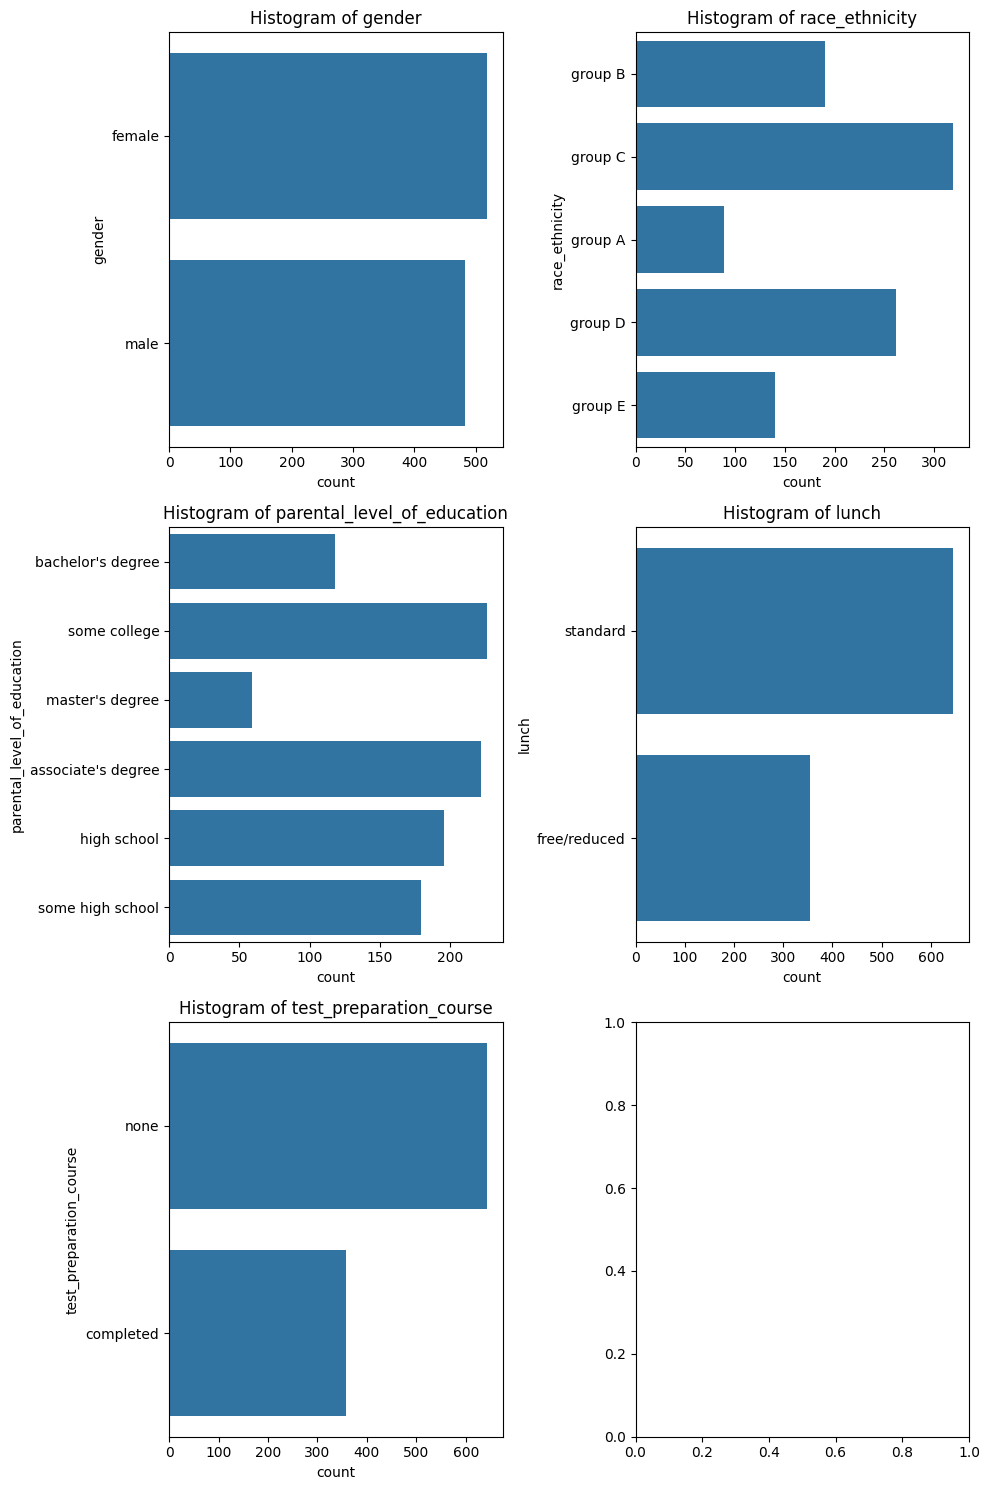

In [103]:
# Check for and distribution outliers in the categorical columns
num_rows = round(np.ceil(len(category_only.columns)/2))
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols*5, num_rows*5))

for i, col in enumerate(category_only.columns):
    sns.countplot(df[col], ax=axs[i//num_cols, i%num_cols])
    axs[i//num_cols, i%num_cols].set_title(f'Histogram of {col}')

plt.tight_layout()

In [105]:
# Perform feature engineering
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


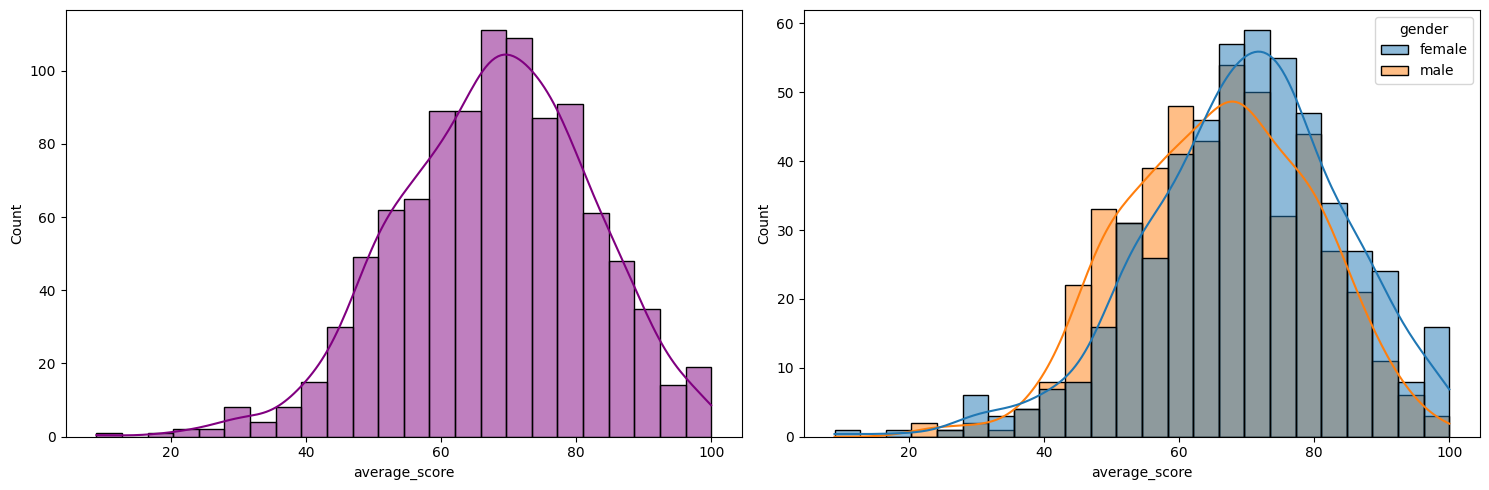

In [106]:
# Perfrom some exploratory data analysis
# Average Score

fig, axs = plt.subplots(1, 2, figsize=(15, 5))  
plt.subplot(121)
sns.histplot(df['average_score'], ax=axs[0], color='purple', kde=True)
plt.subplot(122)
sns.histplot(data=df, x='average_score', hue='gender', kde=True, ax=axs[1])
plt.tight_layout()

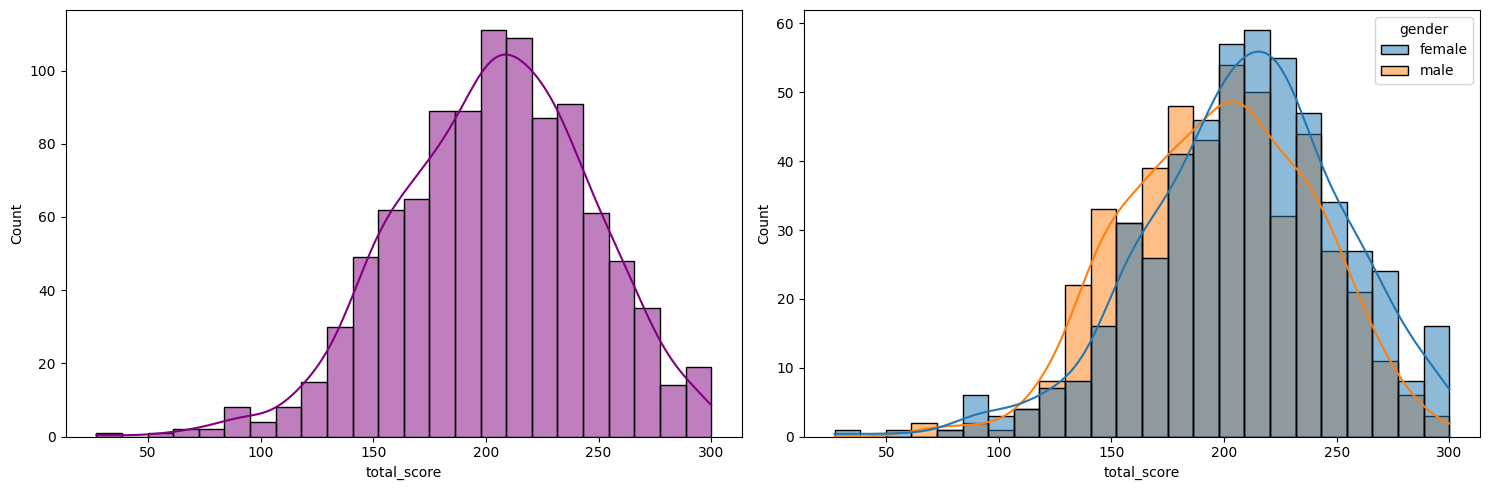

In [107]:
# Total Score
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  
plt.subplot(121)
sns.histplot(df['total_score'], ax=axs[0], color='purple', kde=True)
plt.subplot(122)
sns.histplot(data=df, x='total_score', hue='gender', kde=True, ax=axs[1])
plt.tight_layout()

In [123]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='race_ethnicity', ylabel='average_score'>

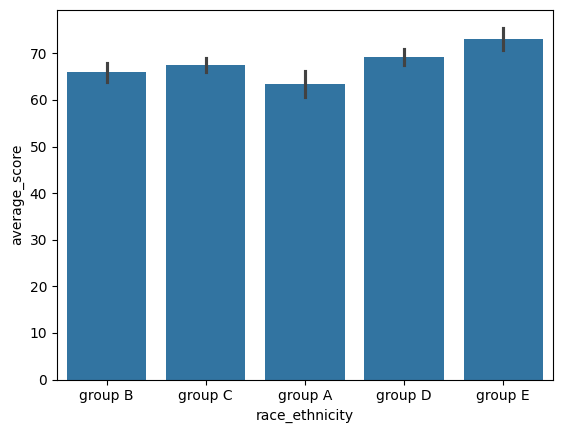

In [ ]:
# Check the distribution of scores across the race ethnicity
sns.barplot(data=df, x='race_ethnicity', y='average_score')

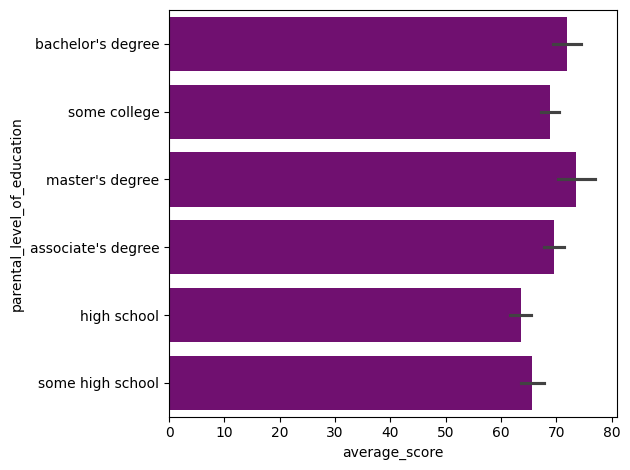

In [133]:
# Check the distribution of scores across the parental level of education
sns.barplot(data=df, y='parental_level_of_education', x='average_score', color='purple'
            , orient='h')
plt.tight_layout()

<Axes: xlabel='test_preparation_course', ylabel='average_score'>

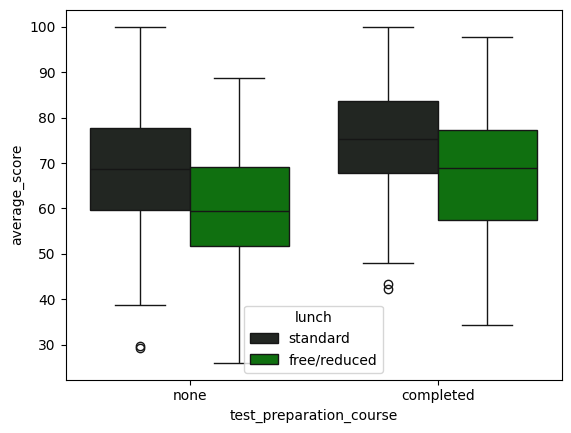

In [137]:
# Check the distribution of scores across the course completion
sns.boxplot(data=df, x='test_preparation_course', y='average_score', hue='lunch',color='green')

<Axes: xlabel='gender', ylabel='average_score'>

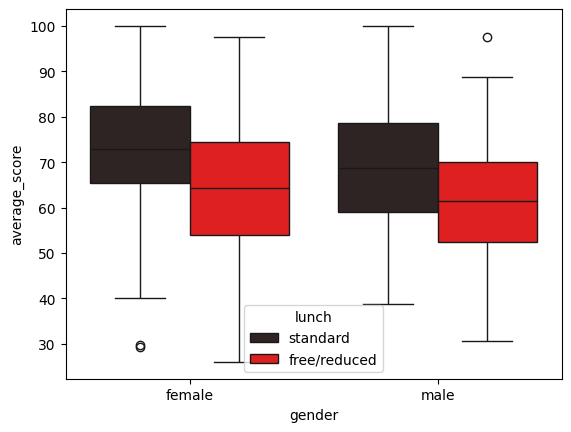

In [139]:
sns.boxplot(data=df, x='gender', y='average_score', hue='lunch',color='red')

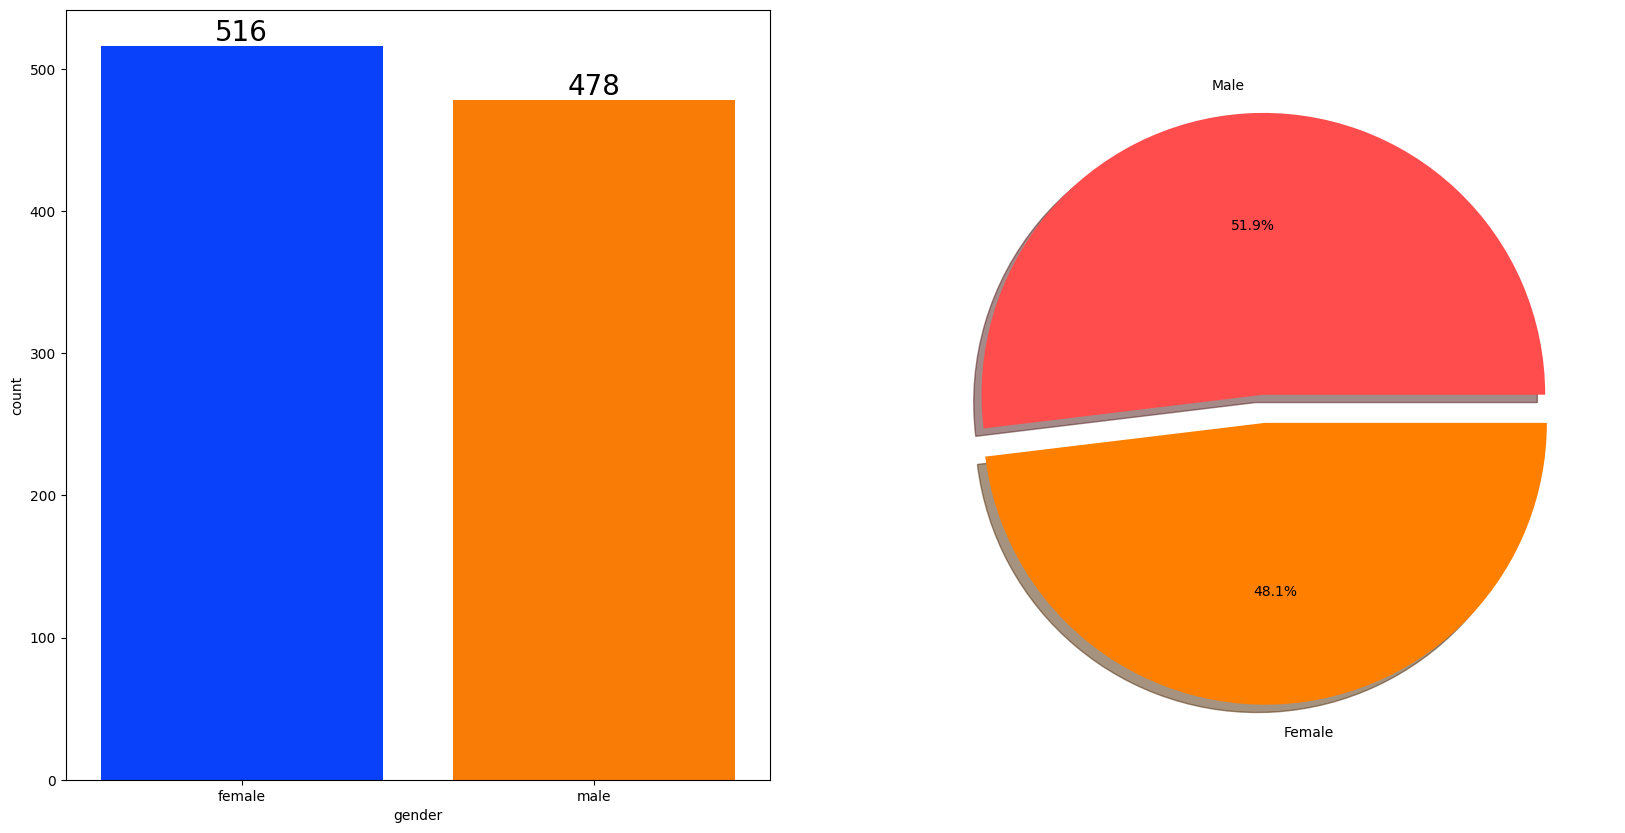

In [140]:
# Check the distribution of scores across gender
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

<Axes: >

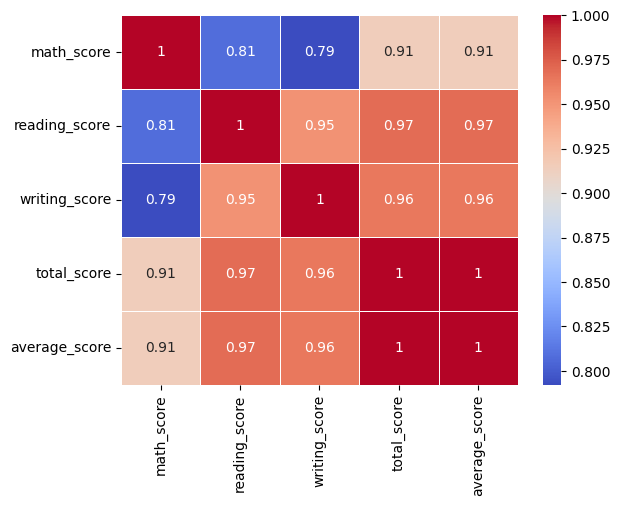

In [143]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', linewidths=0.5)